In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Aprendizaje no supervisado parte 2 - agrupamiento

El agrupamiento (*clustering*) consiste en forma grupos de ejemplos similares de acuerdo a alguna medida de semejanza prefijada o disimilitud (distancia), como la distancia Euclídea.

<img width="60%" src='figures/clustering.png'/>

En esta sección, exploraremos la tarea básica de agrupamiento en algunos datasets sintéticos y del mundo real.

Estas son algunas aplicaciones bastante comunes de los algoritmos de *clustering*:

- Compresión para reducción de datos.
- Resumir los datos como un paso de preprocesamiento para los sistemas de recomendación.
- Agrupar noticias *web* relacionadas (p.ej. Google News) y resultados de búsquedas *web*.
- Realizar perfiles de clientes en estrategias de marketing.

Vamos a empezar creando un dataset sintético simple de dos dimensiones:

In [12]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
X.shape

(100, 2)

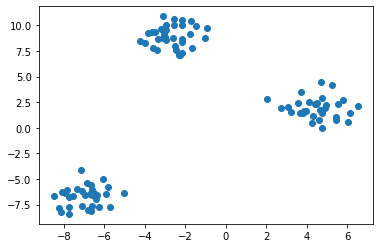

In [13]:
plt.scatter(X[:, 0], X[:, 1]);

En el scatter anterior, podemos ver tres grupos separados de datos y nos gustaría recuperarlos utilizando agrupamiento (algo así como "descubrir" las etiquetas de clase, que ya damos por sentadas en la tarea de clasificación).

Incluso si los grupos son obvios en los datos, es difícil encontrarlos cuando estos datos están en un espacio de alta dimensionalidad, que no podemos visualizar en un único histograma o scatterplot.

Ahora utilizaremos uno de los algoritmos de *clustering* más simples, K-means. Este es un algoritmo iterativo que busca aquellos tres centroides (centro de cada uno de los *clusters*) tales que la distancia desde cada punto a su centroide sea mínima.
La implementación estándar de K-means utiliza la distancia Euclídea, por lo que debemos estar seguros de que todas nuestras variables están en la misma escala, especialmente para datasets reales. Para ello podemos aplicar la estandarización que vimos en el cuaderno anterior.
<br/>
<div class="alert alert-success">
    <b>Pregunta</b>:
     <ul>
      <li>
      ¿Qué salida esperarías obtener con un algoritmo de *clustering*?
      </li>
    </ul>
</div>

In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)

Podemos obtener las etiquetas de los datos o llamando al método ``fit`` y después accediendo al atributo ``labels_`` del estimador KMeans, o llamando a ``fit_predict`` (que aplica los dos pasos seguidos). En cualquier caso, el resultado contiene el identificador del grupo al que asignamos cada punto.

In [15]:
labels = kmeans.fit_predict(X)

In [16]:
labels

array([1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1,
       1, 2, 2, 2, 0, 1, 1, 1, 1, 0, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2,
       2, 0, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 2, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 2, 0, 2, 1, 2, 2, 2, 0,
       2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 1, 2])

In [17]:
print("¿Hemos acertado en todas las etiquetas?", np.all(y == labels))
print("¿En cuantas hemos fallado?", np.sum(y != labels))

¿Hemos acertado en todas las etiquetas? False
¿En cuantas hemos fallado? 100


Vamos a visualizar lo que hemos obtenido

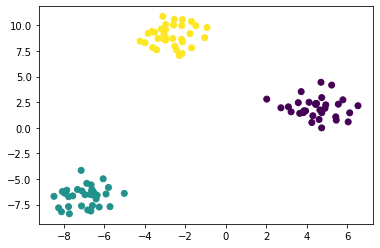

In [18]:
plt.scatter(X[:, 0], X[:, 1], c=labels);

Comparando con las etiquetas reales:

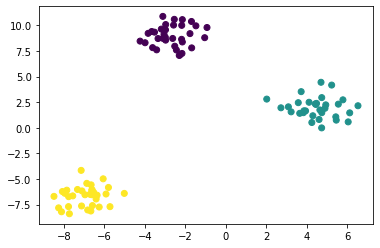

In [19]:
plt.scatter(X[:, 0], X[:, 1], c=y);

Examinando el resultado de forma gráfica, está claro que podríamos estar satisfechos con los resultados obtenidos, pero, en general, nos gustaría tener una evaluación cuantitativa. ¿Qué tal comparar nuestras etiquetas aprendidas con las etiquetas reales?

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score

print('Porcentaje de precisión:', accuracy_score(y, labels))
print(confusion_matrix(y, labels))

Porcentaje de precisión: 0.0
[[ 0  0 34]
 [33  0  0]
 [ 0 33  0]]


In [21]:
np.mean(y == labels)

0.0

<div class="alert alert-success">
    <b>EJERCICIO</b>:
     <ul>
      <li>
      Después de mirar el array `y` real, el scatterplot y las etiquetas aprendidas, ¿sabes por que la precisión es 0.0 cuando debería ser 1.0 y como arreglarlo?
      </li>
    </ul>
</div>

Incluso si conseguimos los mismos grupos, los identificadores asignados son arbitrarios y no podemos recuperar los reales. Por tanto, tendremos que usar otro mecanismo de asignación de rendimiento, como el ``adjusted_rand_score``, el cuál es invariante a cualquier permutación de las etiquetas:

In [22]:
from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(y, labels)

1.0

Una de las desventajas del K-means es que tenemos que especificar el número de *clusters*, cosa que a menudo no conocemos *a priori*. Por ejemplo, veamos que pasa si ponemos k=2 para el dataset sintético anterior:

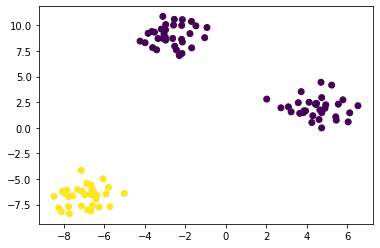

In [23]:
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels);

In [24]:
kmeans.cluster_centers_

array([[ 0.86236563,  5.48955564],
       [-6.95170962, -6.67621669]])

#### El método del codo (*Elbow method*)

El método del codo es una regla general para encontrar el número óptimo de *clusters*. Para ello, analizamos la dispersión de los *clusters* (también llamada inercia o SSE, suma de las distancias de cada punto a su centroide más cercano) para distintos valores de k:

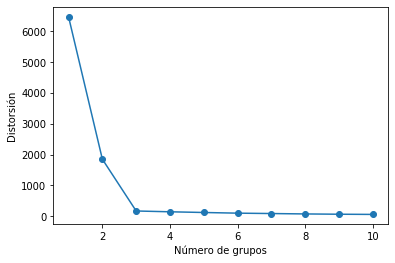

In [25]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Número de grupos')
plt.ylabel('Distorsión')
plt.show()

Después, tomamos el valor que lleva al pico del codo. Como podemos ver, ese valor será k=3 para este caso, lo que tiene sentido dado el conocimiento que tenemos del dataset.

**El agrupamiento siempre viene con suposiciones**: Un algoritmo de agrupamiento encuentra grupos haciendo suposiciones acerca de cómo debería agruparse los ejemplos. Cada algoritmo hace suposiciones distintas y la calidad e interpretabilidad de nuestros resultados dependerá de si estas suposiciones son correctas para nuestro objetivo. Para el K-means, el modelo subyacente supone que todos los grupos tienen la misma varianza, esférica (si usamos distancia Euclídea).

**En general, no hay ninguna garantía de que la estructura encontrada por un algoritmo de *clustering* sea aquello en lo que estás interesado**.


Fácilmente, podemos crear un dataset que tenga grupos no isotrópicos, caso en el que KMeans fallará:

Text(0.5, 1.0, 'Distinto tamaño')

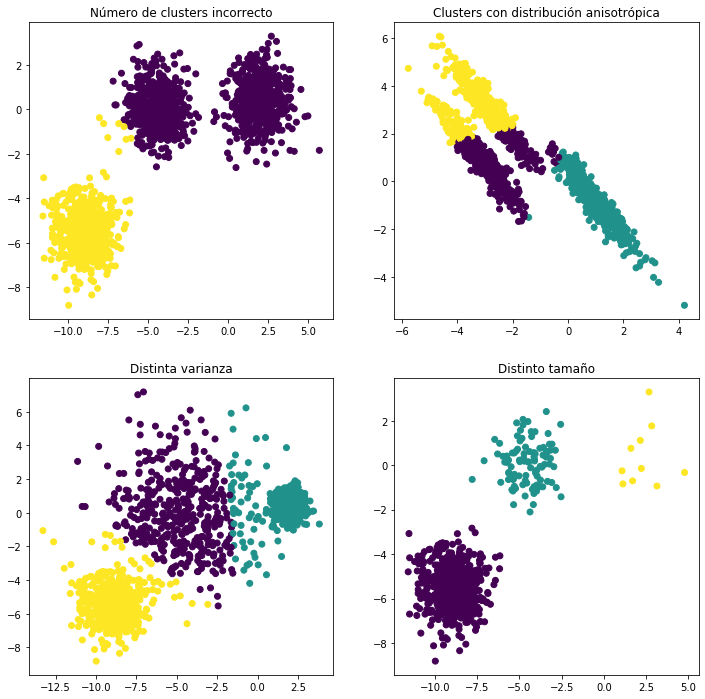

In [26]:
plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Número de clusters incorrecto
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Número de clusters incorrecto")

# Datos distribuidos de forma anisotrópica
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Clusters con distribución anisotrópica")

# Distinta varianza
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Distinta varianza")

# Clusters de distinto tamaño
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Distinto tamaño")


## Algunos métodos importantes de agrupamiento

A continuación, algunos de los algoritmos de agrupamiento más importantes: 

- `sklearn.cluster.KMeans`: <br/>
    El más simple aunque más efectivo algoritmo de agrupamiento. Hay que proporcionarle el número de grupos y asume que los datos están normalizados.
- `sklearn.cluster.MeanShift`: <br/>
    Puede encontrar *mejores* clusters que KMeans pero no es escalable para muchos ejemplos.
- `sklearn.cluster.DBSCAN`: <br/>
    Puede detectar grupos con formas irregulares, basándose en densidades, es decir, las regiones dispersas del espacio de entrada tiene más posibilidades de convertirse en fronteras entre *clusters*. También permite detectar *outliers* (datos que no pertenecen a ningún grupo.
- `sklearn.cluster.AffinityPropagation`: <br/>
    Algoritmo de agrupamiento basado en paso de mensajes entre puntos.
- `sklearn.cluster.SpectralClustering`: <br/>
    KMeans aplicado a la proyección de un grafo Laplaciano normalizado: encuentra cortes del grafo normalizado cuando la matriz de afinidad se interpreta como la matriz de adyacencia de un grafo.
- `sklearn.cluster.Ward`: <br/>
    Implementa clustering jerárquico basado en el algoritmo de Ward, una aproximación que minimiza la varianza intra-cluster. En cada paso, minimiza la suma de diferencias cuadradas internas de todos los puntos de todos los grupos (criterio de inercia).

Entre estos, el algoritmo de Ward, el SpectralClustering, el DBSCAN y el método de propagación de afinidad pueden trabajar también con matrices de similitud precomputadas.

<img src="figures/cluster_comparison.png" width="900">

<div class="alert alert-success">
    <b>EJERCICIO: agrupamiento de dígitos</b>:
     <ul>
      <li>
      Aplica agrupamiento K-means a los datos de los dígitos, buscando 10 dígitos. Visualiza los centros como imágenes (es decir, redimensiona cada uno a 8x8 y usa ``plt.imshow``). ¿Te parece que los grupos estén relacionados con algunos dígitos particulares? ¿Qué valores de ``adjusted_rand_score`` obtienes?
      </li>
      <li>
      Visualiza los dígitos proyectados como se hizo en el ejemplo anterior pero, esta vez, utiliza las etiquetas que proporciona KMeans como colores. ¿Qué observas?
      </li>
    </ul>
</div>

In [168]:
from sklearn.datasets import load_digits
digits = load_digits()
digs=10
kmeans = KMeans(n_clusters=digs)
labels = kmeans.fit_predict(digits.data)

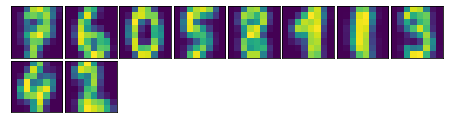

In [169]:
fig = plt.figure(figsize=(6, 6))  # tamaño en pulgadas
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# mostrar algunos dígitos: cada imagen es de 8x8
for i in range(digs):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.reshape(kmeans.cluster_centers_[i], (8,8)))#, cmap=plt.cm.binary, interpolation='nearest')
    

#for i in range(10):
 #   plt.imshow(np.reshape(kmeans.cluster_centers_[i], (8,8)))

In [171]:
adjusted_rand_score(digits.target, labels)

0.6567188861633569